In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

FIRST WEBSITE 'LIST OF COUNTRIS BY POPULATION'

In [29]:
#FOR HEADERS
URL= 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
path= requests.get(URL)
soup= BeautifulSoup(path.content,'html.parser')
Tab1=soup.find_all('table')[0]
head1=Tab1.find_all('th')[:6]
header= [row.text.strip() for row in head1]
header[0]= 'Countries'
header[1]= 'Regions'
header[2]= 'Sub-regions'


col_body=[]
Title1=soup.find_all('table')[0]
column_data=Title1.find_all('tr')
for row in column_data[1:]:
    row_data=row.find_all('td')
    row_info= [data.text.strip() for data in row_data]
    col_body.append(row_info)

DATA= pd.DataFrame(col_body,columns=header)
DATA


,Countries,Regions,Sub-regions,Population(1 July 2022),Population(1 July 2023),Change
0,India,Asia,Southern Asia,"1,417,173,173","1,428,627,663",+0.81%
1,China[a],Asia,Eastern Asia,"1,425,887,337","1,425,671,352",−0.02%
2,United States,Americas,Northern America,"338,289,857","339,996,564",+0.50%
3,Indonesia,Asia,South-eastern Asia,"275,501,339","277,534,123",+0.74%
4,Pakistan,Asia,Southern Asia,"235,824,863","240,485,658",+1.98%
...,...,...,...,...,...,...
232,Montserrat (United Kingdom),Americas,Caribbean,"4,390","4,387",−0.07%
233,Falkland Islands (United Kingdom),Americas,South America,"3,780","3,791",+0.29%
234,Niue,Oceania,Polynesia,"1,934","1,935",+0.05%
235,Tokelau (New Zealand),Oceania,Polynesia,"1,871","1,893",+1.18%


2ND WEBSITE 'LIST OF COUNTRIES BY GDP(NOMINAL)'

In [30]:
URL2='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
path2= requests.get(URL2)
soup2= BeautifulSoup(path2.content,'html.parser')
Table2=soup2.find('table',{'class':'wikitable'})
table2= Table2.find_all('th')
header2=[col.text.strip() for col in table2]
Heading_created=['Countries','Regions','GDP (IMF ESTIMATE)','Year','GDP (World Bank ESTIMATE)','Year','GDP (UN ESTIMATE)','Year']
Intel = []
for rows2 in Table2.find_all('tr')[2:]:
    colms=rows2.find_all('td')
    info2=[data2.text.strip() for data2 in colms]
    
    Intel.append(info2)
df2= pd.DataFrame(Intel,columns = Heading_created)
df2= df2.iloc[1:]
df2.reset_index(inplace= True,drop='index')
df2


,Countries,Regions,GDP (IMF ESTIMATE),Year,GDP (World Bank ESTIMATE),Year,GDP (UN ESTIMATE),Year
0,United States,Americas,"26,949,643",2023,"25,462,700",2022,"23,315,081",2021
1,China,Asia,"17,700,899",[n 1]2023,"17,963,171",[n 3]2022,"17,734,131",[n 1]2021
2,Germany,Europe,"4,429,838",2023,"4,072,192",2022,"4,259,935",2021
3,Japan,Asia,"4,230,862",2023,"4,231,141",2022,"4,940,878",2021
4,India,Asia,"3,732,224",2023,"3,385,090",2022,"3,201,471",2021
...,...,...,...,...,...,...,...,...
208,Palau,Oceania,267,2023,—,218,2021,None
209,Kiribati,Oceania,246,2023,223,2022,227,2021
210,Nauru,Oceania,150,2023,151,2022,155,2021
211,Montserrat,Americas,—,—,72,2021,None,None


Cleaning Table 1

In [31]:
DATA= DATA.loc[~(DATA['Countries'].isna())]
DATA['clean1']=DATA['Countries'].apply(lambda x: x.split('[')[0])
DATA['clean1']=DATA['clean1'].str.strip()
#RE-ARREANGING THE COLUMNS
col1= list(DATA.columns.values)
Table_1= DATA[[col1[-1]]+ col1[1:6]]
Table_1.rename(columns={'clean1':'Countries'},inplace=True)
Table_1['Regions']=Table_1['Regions'].str.strip()
Table_1['Sub-regions']=Table_1['Sub-regions'].str.strip()

Table_1



C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2030366463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['clean1']=DATA['Countries'].apply(lambda x: x.split('[')[0])
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2030366463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['clean1']=DATA['clean1'].str.strip()
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2030366463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

,Countries,Regions,Sub-regions,Population(1 July 2022),Population(1 July 2023),Change
0,India,Asia,Southern Asia,"1,417,173,173","1,428,627,663",+0.81%
1,China,Asia,Eastern Asia,"1,425,887,337","1,425,671,352",−0.02%
2,United States,Americas,Northern America,"338,289,857","339,996,564",+0.50%
3,Indonesia,Asia,South-eastern Asia,"275,501,339","277,534,123",+0.74%
4,Pakistan,Asia,Southern Asia,"235,824,863","240,485,658",+1.98%
...,...,...,...,...,...,...
231,Saint Helena (United Kingdom),Africa,Western Africa,"5,374","5,314",−1.12%
232,Montserrat (United Kingdom),Americas,Caribbean,"4,390","4,387",−0.07%
233,Falkland Islands (United Kingdom),Americas,South America,"3,780","3,791",+0.29%
234,Niue,Oceania,Polynesia,"1,934","1,935",+0.05%


Cleaning Table 2

In [154]:
df2
for n in df2['clean3'].unique():
    print(n)
colt= ['Countries','Regions','GDP (IMF ESTIMATE)','Year','GDP (World Bank ESTIMATE)','Year2','GDP (UN ESTIMATE)','Year3']
df2.columns= colt
df2['clean']= df2['Year'].apply(lambda x: x.split(']')[-1])
df2['clean2']= df2['Year2'].apply(lambda x: x.split(']')[-1])
df2['Year3'].fillna('0',inplace=True)
df2['clean3']= df2['Year3'].apply(lambda x: x.split(']')[-1])  
df2.drop(columns=['Year','Year2','Year3'],inplace=True)
df2.rename(columns={'clean':'Year','clean2':'Year2','clean3':'Year3'},inplace=True)

#Re-arranginig the columns in the columns table
coln= list(df2.columns.values)
Table_2= df2[coln[0:3]+ [coln[-3]]+ [coln[3]]+ [coln[-2]]+ [coln[4]]+ [coln[-1]]]  
Table_2.drop(columns=['GDP (UN ESTIMATE)','Year3'],inplace=True)

#Cleaninig Inside The Table
Table_2=Table_2.loc[~((Table_2['GDP (IMF ESTIMATE)']== '—') & (Table_2['Year']=='—'))]
Table_2.loc[Table_2['Year']== '107,352',['Year','GDP (World Bank ESTIMATE)','Year2']]=['—','107,352','2022']
Table_2.loc[Table_2['Year']== '74,404',['Year','GDP (World Bank ESTIMATE)','Year2']]=['—','74,404','2022']
Table_2.loc[Table_2['Year']== '7,551',['Year','GDP (World Bank ESTIMATE)','Year2']]=['—','7,551','2022']
Table_2.loc[Table_2['Year']== '1,572',['Year','GDP (World Bank ESTIMATE)','Year2']]=['—','1,572','2022']
Table_2.loc[Table_2['Year']== '1,139',['Year','GDP (World Bank ESTIMATE)','Year2']]=['—','1,139','2022']
Table_2.loc[Table_2['Year']== '2021','Year']='2023'
Table_2.loc[Table_2['GDP (World Bank ESTIMATE)']=='—','Year2']='—'

#RESETTING
#Table_2=df2

#Table_2


C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\1074663139.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_2.loc[Table_2['GDP (World Bank ESTIMATE)']=='—','Year2']='—'


Merging Table_1 and Table_2

In [176]:
Merged_In= Table_1.merge(Table_2, on=['Countries','Regions'],how='inner')
Merged_In.drop(columns='Change',inplace=True)
Merged_In.rename(columns={'Population(1 July 2022)':'Population 2022','Population(1 July 2023)':'Population 2023'},inplace=True)
Merged_In

,Countries,Regions,Sub-regions,Population 2022,Population 2023,GDP (IMF ESTIMATE),Year,GDP (World Bank ESTIMATE),Year2
0,India,Asia,Southern Asia,"1,417,173,173","1,428,627,663","3,732,224",2023,"3,385,090",2022
1,China,Asia,Eastern Asia,"1,425,887,337","1,425,671,352","17,700,899",2023,"17,963,171",2022
2,United States,Americas,Northern America,"338,289,857","339,996,564","26,949,643",2023,"25,462,700",2022
3,Indonesia,Asia,South-eastern Asia,"275,501,339","277,534,123","1,417,387",2023,"1,319,100",2022
4,Pakistan,Asia,Southern Asia,"235,824,863","240,485,658","340,636",2023,"376,533",2022
...,...,...,...,...,...,...,...,...,...
182,Marshall Islands,Oceania,Micronesia,"41,569","41,996",277,2023,280,2022
183,San Marino,Europe,Southern Europe,"33,661","33,642","1,998",2023,—,—
184,Palau,Oceania,Micronesia,"18,055","18,058",267,2023,—,—
185,Nauru,Oceania,Micronesia,"12,668","12,780",150,2023,151,2022


In [368]:
Melt_t= Merged_In.melt(id_vars=['Countries','Regions','Sub-regions','GDP (IMF ESTIMATE)','Year','GDP (World Bank ESTIMATE)','Year2'],value_vars=['Population 2022','Population 2023'],var_name=['Population Attributes'],value_name='Population')
Melt_T= Melt_t.melt(id_vars=['Countries','Regions','Sub-regions','Year','Year2','Population Attributes','Population'],value_vars=['GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)'],var_name=['GDP Attributes'],value_name='GDP' )
Melt_Ti= Melt_T.melt(id_vars=['Countries','Regions','Sub-regions','Population Attributes','Population','GDP Attributes','GDP'],value_vars=['Year','Year2'],var_name=['Years Attributes'],value_name='Years')
Table_Final= Melt_Ti.loc[((Melt_Ti['Population Attributes']=='Population 2022') & (Melt_Ti['GDP Attributes']=='GDP (World Bank ESTIMATE)')& (Melt_Ti['Years Attributes']== 'Year2')) | ((Melt_Ti['Population Attributes']=='Population 2023') & (Melt_Ti['GDP Attributes']=='GDP (IMF ESTIMATE)')& (Melt_Ti['Years Attributes']== 'Year'))]
Table_Final.reset_index(drop='index',inplace=True)

## Reset table
#Table_Final= Melt_Ti

##Table_Final.loc[Table_Final['GDP']=='—']
Table_Final.iloc[57,-1]='2023'
Table_Final.iloc[81,-1]='2023'
Table_Final.iloc[229,-1]='2022'
Table_Final.iloc[237,-1]='2022'
Table_Final.iloc[241,-1]='2022'
Table_Final.iloc[269,-1]='2022'
Table_Final.iloc[292,-1]='2022'
Table_Final.iloc[342,-1]='2022'
Table_Final.iloc[362,-1]='2022'
Table_Final.iloc[370,-1]='2022'
Table_Final.iloc[371,-1]='2022'

Table_Final

C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2975708699.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_Final.iloc[57,-1]='2023'
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2975708699.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_Final.iloc[81,-1]='2023'
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_920\2975708699.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Table_Final.iloc[229,-1]='2022'
C:\Use

In [369]:
Final_Tab= Table_Final
#REMODIFING REGION COLUMNS [AMERICAS INTO NORTH AMERICA and SOUTH AMERICA]
Final_Tab.loc[Final_Tab['Sub-regions'].isin(['Northern America','Central America','Caribbean']), 'Regions']= 'North America'
Final_Tab.loc[Final_Tab['Sub-regions']== 'South America','Regions']= 'South America'


In [419]:
Final_Tab.rename(columns={'GDP[000,000]':'GDP nomial'},inplace=True)
Final_Tab['Population']=Final_Tab['Population'].str.replace(',','').astype(int)
Final_Tab['Population[000,000]']= Final_Tab['Population'].str.replace(',','').astype(int)
Final_Tab['Population[000,000]']= Final_Tab['Population[000,000]']/1000000
Final_Tab['GDP [000,000]']= Final_Tab['GDP'].str.replace(',','')
Final_Tab['GDP [000,000]']= pd.to_numeric(Final_Tab['GDP [000,000]'],errors='coerce')
Final_Tab['Per Capital Income']= Final_Tab['GDP [000,000]l']/Final_Tab['Population[000,000]']
#######Table_Final.drop(columns='GDP_num',inplace=True)
Table_Final['GDP'].str.replace('—',pd.NA)
####Final_Tab=Final_Tab.loc[~Final_Tab['GDP']=='—']=pd.NA
Final_Tab.reset_index(drop='index',inplace= True)
Final_Tab

,Countries,Regions,Sub-regions,Population Attributes,Population,GDP Attributes,GDP,Years Attributes,Years,"Population[000,000]",GDP nomial,Per Capital Income
0,India,Asia,Southern Asia,Population 2023,"1,428,627,663",GDP (IMF ESTIMATE),"3,732,224",Year,2023,1428.627663,3732224.0,2612.453963
1,China,Asia,Eastern Asia,Population 2023,"1,425,671,352",GDP (IMF ESTIMATE),"17,700,899",Year,2023,1425.671352,17700899.0,12415.834109
2,United States,Americas,Northern America,Population 2023,"339,996,564",GDP (IMF ESTIMATE),"26,949,643",Year,2023,339.996564,26949643.0,79264.456920
3,Indonesia,Asia,South-eastern Asia,Population 2023,"277,534,123",GDP (IMF ESTIMATE),"1,417,387",Year,2023,277.534123,1417387.0,5107.072906
4,Pakistan,Asia,Southern Asia,Population 2023,"240,485,658",GDP (IMF ESTIMATE),"340,636",Year,2023,240.485658,340636.0,1416.450373
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Dominica,Americas,Caribbean,Population 2022,"72,738",GDP (World Bank ESTIMATE),612,Year2,2022,0.072738,612.0,8413.758971
359,Saint Kitts and Nevis,Americas,Caribbean,Population 2022,"47,658",GDP (World Bank ESTIMATE),962,Year2,2022,0.047658,962.0,20185.488271
360,Marshall Islands,Oceania,Micronesia,Population 2022,"41,569",GDP (World Bank ESTIMATE),280,Year2,2022,0.041569,280.0,6735.788689
361,Nauru,Oceania,Micronesia,Population 2022,"12,668",GDP (World Bank ESTIMATE),151,Year2,2022,0.012668,151.0,11919.797916


In [413]:
#Final_Tab.to_csv(r"C:\Users\DORCAS\Documents\Python\World Population.csv",index=False)

In [37]:
#Final_Tab= pd.read_csv(r"C:\Users\DORCAS\Documents\Python\World Population.csv")

In [39]:
#Final_Tab['Population']=Final_Tab['Population'].str.replace(',','').astype(int)
#Final_Tab.rename(columns={'GDP nomial':'GDP[000,000]'},inplace=True)

In [129]:
Population_2022= Final_Tab.loc[Final_Tab['Years']==2022]
Population_2022_count= Population_2022.groupby('Countries',as_index=False).sum().sort_values(by='Population[000,000]', ascending= False).head(20)
Population_2022_count

,Countries,Years,"Population[000,000]","GDP[000,000]",Per Capital Income
34,China,2022,1425.887337,17963171.0,12597.889422
72,India,2022,1417.173173,3385090.0,2388.621281
178,United States,2022,338.289857,25462700.0,75268.883985
73,Indonesia,2022,275.501339,1319100.0,4787.998508
124,Pakistan,2022,235.824863,376533.0,1596.663707
120,Nigeria,2022,218.541212,477386.0,2184.420941
22,Brazil,2022,215.313498,1920096.0,8917.675937
12,Bangladesh,2022,171.186373,460201.0,2688.303934
136,Russia,2022,144.713314,2240422.0,15481.795960
105,Mexico,2022,127.504126,1414187.0,11091.303822


PLOTTING OF GRAPH

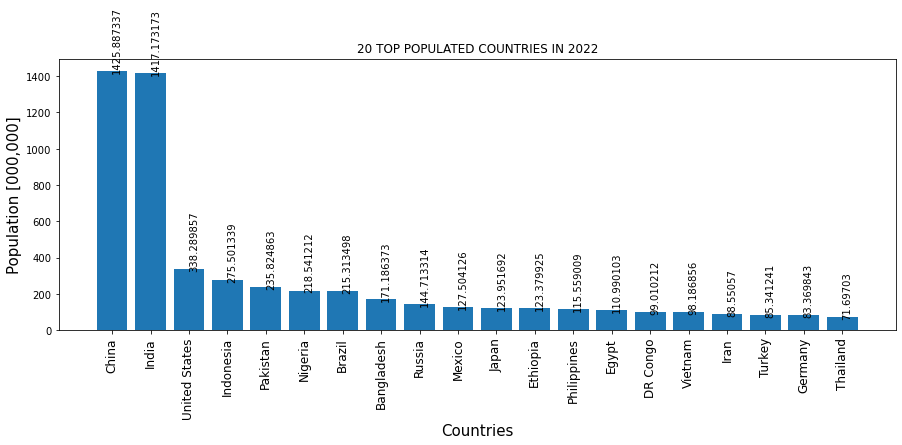

In [131]:
Population_2022= Final_Tab[Final_Tab['Years']==2022]
Population_20= Population_2022.groupby('Countries', as_index= False).sum().sort_values(by='Population[000,000]',ascending=False).head(20)
Countries= [Countries for Countries in Population_20.Countries]

plt.figure(figsize= (15,5))
plt.bar(Countries,Population_20['Population[000,000]'])
for x,y in zip(Countries,Population_20['Population[000,000]']):
    plt.text(x,y,str(y),rotation='vertical')
plt.title('20 TOP POPULATED COUNTRIES IN 2022')
plt.xlabel('Countries', size= 15)
plt.ylabel('Population [000,000]',size= 15)
plt.xticks(Countries, rotation= 'vertical', size=12)
plt.show()
    


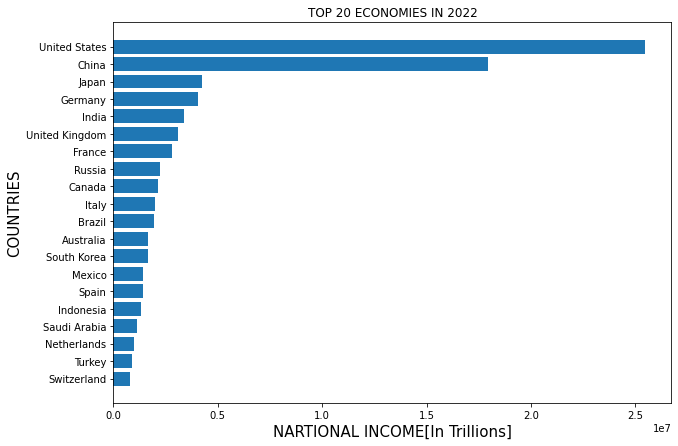

In [404]:
Population_2022= Final_Tab[Final_Tab['Years']==2022]
Economy_20= Population_2022.groupby('Countries', as_index= False).sum().sort_values(by='GDP[000,000]',ascending=False).head(20)
Top_Economy= Economy_20.sort_values(by='GDP[000,000]')
Countries_Eco= [Countries for Countries in Top_Economy.Countries]

plt.figure(figsize= (10,7))
plt.barh(Countries_Eco, Top_Economy['GDP[000,000]'])
plt.title('TOP 20 ECONOMIES IN 2022')
plt.xlabel('NARTIONAL INCOME[In Trillions]', size= 15)
plt.ylabel('COUNTRIES',size= 15)
plt.show()
    


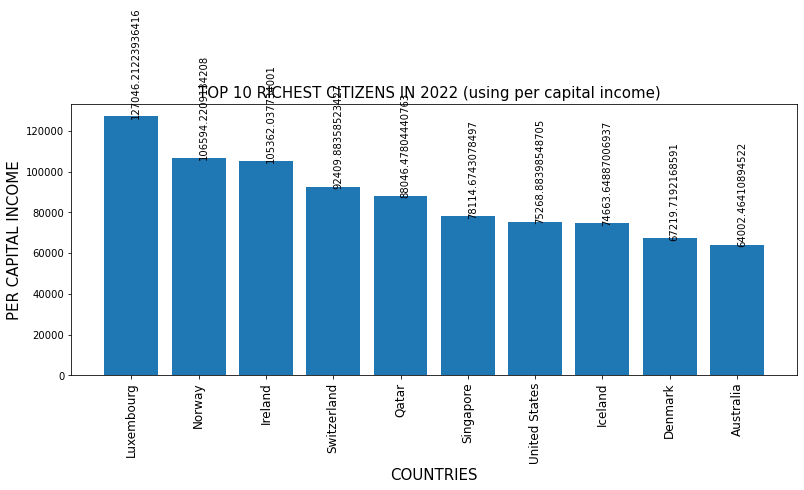

In [429]:
Population_2022= Final_Tab[Final_Tab['Years']==2022]
Citizen_20= Population_2022.groupby('Countries', as_index= False).sum().sort_values(by='Per Capital Income',ascending=False).head(10)
Countries_cap= [Countries for Countries in Citizen_20.Countries]

plt.figure(figsize= (13,5))
plt.bar(Countries_cap, Citizen_20['Per Capital Income'])
for x,y in zip(Countries_cap, Citizen_20['Per Capital Income']):
    plt.text(x,y,str(y), rotation='vertical')
plt.title('TOP 10 RICHEST CITIZENS IN 2022 (using per capital income)  ',size=15)
plt.xticks(rotation='vertical', size= 12)
plt.xlabel('COUNTRIES', size= 15)
plt.ylabel('PER CAPITAL INCOME',size= 15)
plt.show()
    


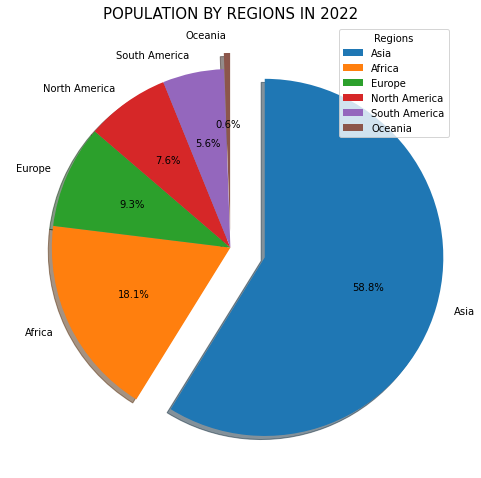

In [179]:
Population_Region= Population_2022.groupby('Regions',as_index=False).sum().sort_values(by= 'Population[000,000]',ascending=False)
Region= [Regions for Regions in Population_Region.Regions]

plt.figure(figsize=(8,10))
plt.pie(Population_Region['Population[000,000]'],labels= Region, shadow=True,explode=[0.2,0,0,0,0,0.09],startangle= 90,counterclock=False, frame=False,autopct= '%1.1f%%')
plt.title('POPULATION BY REGIONS IN 2022',size= 15)
plt.legend(title= 'Regions',loc= 'upper right')
plt.show()

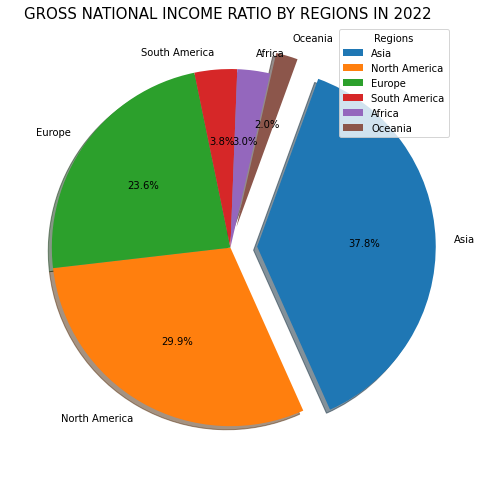

In [221]:
GDP_2022= Population_2022.groupby('Regions',as_index=False).sum().sort_values(by= 'GDP[000,000]',ascending=False)
Region_2022=[Regions for Regions in GDP_2022.Regions]
plt.figure(figsize=(8,11))
plt.pie(GDP_2022['GDP[000,000]'],labels=Region_2022,shadow=True,autopct='%1.1f%%',counterclock=False,startangle= 70, explode=[0.15,0,0,0,0,0.12])
plt.title('GROSS NATIONAL INCOME RATIO BY REGIONS IN 2022 ', size= 15)
plt.legend(title= 'Regions',loc='upper right')
plt.show()

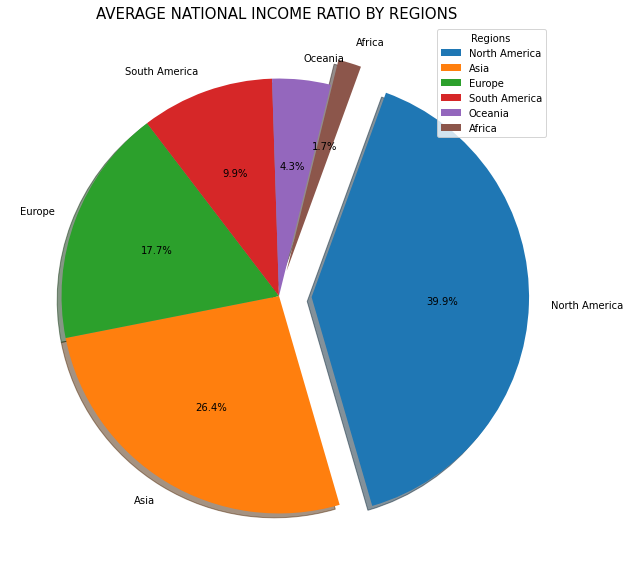

In [479]:
AVE_GDP_2022= Population_2022.groupby('Regions',as_index=False).mean().sort_values(by= 'GDP[000,000]',ascending=False)
Ave_Region_2022=[Regions for Regions in AVE_GDP_2022.Regions]
plt.figure(figsize=(10,10))
plt.pie(AVE_GDP_2022['GDP[000,000]'],labels=Ave_Region_2022,shadow=True,autopct='%1.1f%%',counterclock=False,startangle= 70, explode=[0.15,0,0,0,0,0.12])
plt.title('AVERAGE NATIONAL INCOME RATIO BY REGIONS ', size= 15)
plt.legend(title= 'Regions',loc='upper right')
plt.show()

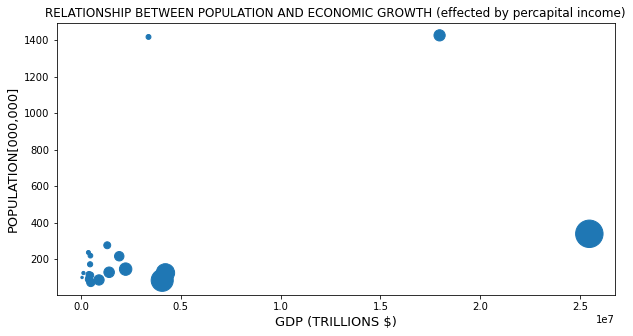

The Relationship between "POPULATION" and "NATIONAL INCOME" is positive by 0.47073951708693007


In [644]:
Population_sca= Population_20['Population[000,000]']
GDP_sca_x= Population_20['GDP[000,000]']
Per_Capital_Inc_y= (Population_20['Per Capital Income']/100)

plt.figure(figsize=(10,5))
plt.scatter(GDP_sca_x,Population_sca,s=Per_Capital_Inc_y)

plt.title('RELATIONSHIP BETWEEN POPULATION AND ECONOMIC GROWTH (effected by percapital income)',size=12)
plt.xlabel('GDP (TRILLIONS $)',size=13)
plt.ylabel('POPULATION[000,000]',size=13)
#plt.xlim(0,1)
plt.show()
print('The Relationship between "POPULATION" and "NATIONAL INCOME" is positive by 0.47073951708693007')

C:\Users\DORCAS\AppData\Local\Temp\ipykernel_9492\604186148.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Corr_2022= Population_2022.groupby('Regions')['Population[000,000]','GDP[000,000]'].corr()
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_9492\604186148.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Retriving_Region= Population_2022.groupby('Regions',as_index=False)['Population[000,000]','GDP[000,000]'].count()


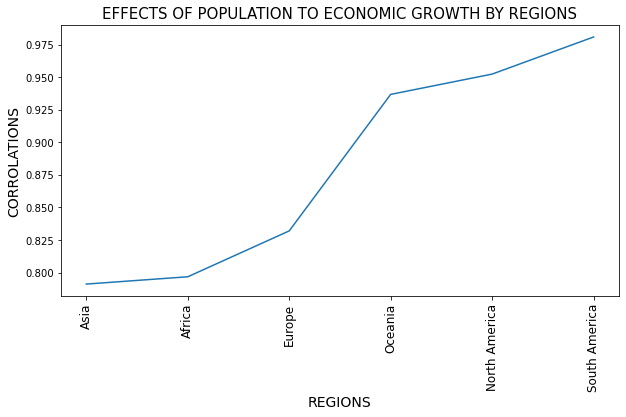

In [364]:
Population_2022= Final_Tab.loc[Final_Tab['Years']==2022]
Corr_2022= Population_2022.groupby('Regions')['Population[000,000]','GDP[000,000]'].corr()
Cor= Corr_2022[::2]
Retriving_Region= Population_2022.groupby('Regions',as_index=False)['Population[000,000]','GDP[000,000]'].count()
#INCSERTING NEW COLUMN STARTING FROM 1. INCREMENT IS BY 1
#Retriving_Region.insert(0,'new Col',range(1,1+len(Retriving_Region)))
#Retriving_Region
#Cor
#CorT= Cor.groupby('Regions',as_index=False).mean()
CorB= Population_2022.groupby('Regions',as_index=False).mean()
CorB.insert(0,'test',range(1,1+len(CorB)))
#CorT.insert(0,'test',range(1,1+len(CorT)))
Cor_B= CorB[CorB.columns.values[0:2]]


#CorT
Merge_Cor= CorT.merge(Cor_B, on='test', how='left')
Impact= Merge_Cor.groupby('Regions',as_index=False)['GDP[000,000]'].mean().sort_values(by='GDP[000,000]')
Region_Cor= [Regions for Regions in Impact.Regions]

plt.figure(figsize=(10,5))
plt.plot(Region_Cor,Impact['GDP[000,000]'])
plt.xticks(rotation= 'vertical',size=12)
plt.xlabel('REGIONS',size=14)
plt.ylabel('CORROLATIONS',size=14)
plt.title('EFFECTS OF POPULATION TO ECONOMIC GROWTH BY REGIONS', size=15)
plt.show()

C:\Users\DORCAS\AppData\Local\Temp\ipykernel_9492\2071419540.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Countries_x, rotation= 'vertical', size= 13)


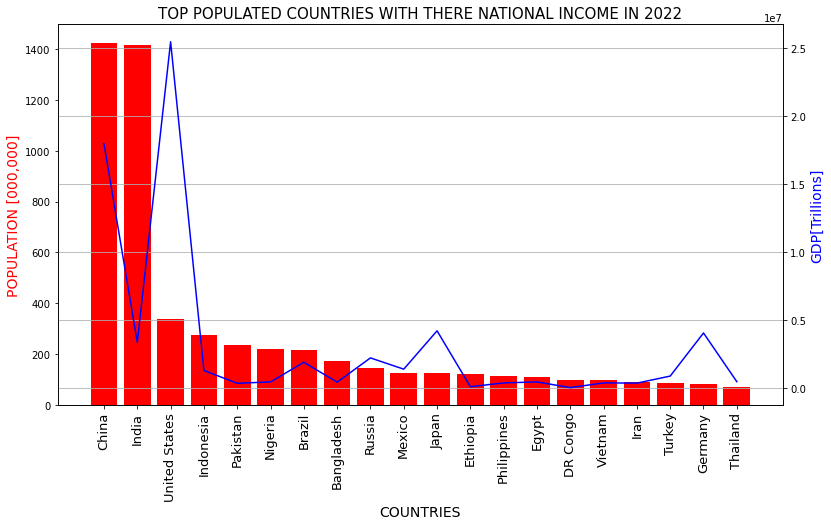

In [625]:
Pop_20= Population_2022.groupby('Countries',as_index=False).sum().sort_values(by='Population[000,000]',ascending=False).head(20)
Countries_x= [Countries for Countries in Pop_20.Countries]
#Countries_x
#Popul_22= 

fig, ax1= plt.subplots(figsize= (13,7))

ax2= ax1.twinx()
ax1.bar(Countries_x,Pop_20['Population[000,000]'], color= 'red')
ax2.plot(Countries_x,Pop_20['GDP[000,000]'], color= 'blue')

ax1.set_ylabel('POPULATION [000,000]',size=14, color= 'red')
ax2.set_ylabel('GDP[Trillions]',size=14, color='blue')
ax1.set_xlabel('COUNTRIES',size=14)
ax1.set_xticklabels(Countries_x, rotation= 'vertical', size= 13)

plt.title('TOP POPULATED COUNTRIES WITH THERE NATIONAL INCOME IN 2022', size= 15)
plt.grid()
plt.show()

C:\Users\DORCAS\AppData\Local\Temp\ipykernel_9492\1205138106.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Countries_x, rotation= 'vertical', size= 13)


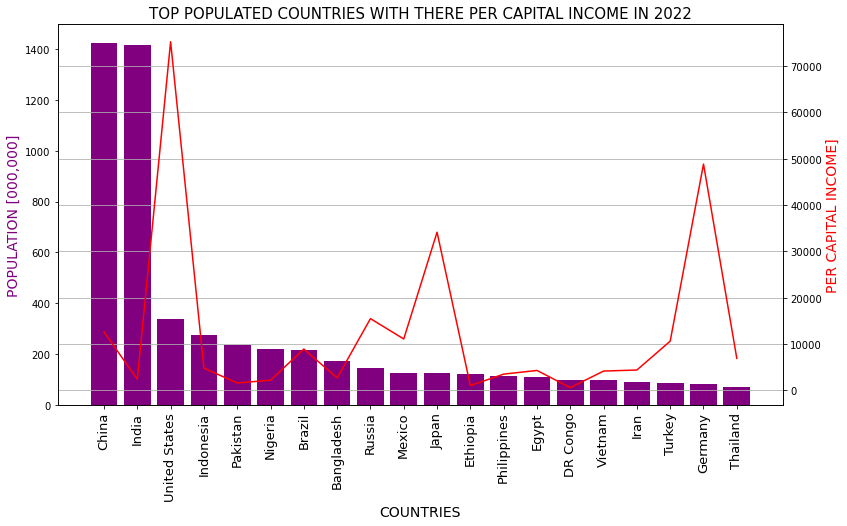

In [629]:
Pop_20= Population_2022.groupby('Countries',as_index=False).sum().sort_values(by='Population[000,000]',ascending=False).head(20)
Countries_x= [Countries for Countries in Pop_20.Countries]
#Countries_x
#Popul_22= 

fig, ax1= plt.subplots(figsize= (13,7))

ax2= ax1.twinx()
ax1.bar(Countries_x,Pop_20['Population[000,000]'], color= 'purple')
ax2.plot(Countries_x,Pop_20['Per Capital Income'], color= 'red')

ax1.set_ylabel('POPULATION [000,000]',size=14, color= 'purple')
ax2.set_ylabel('PER CAPITAL INCOME]',size=14, color='red')
ax1.set_xlabel('COUNTRIES',size=14)
ax1.set_xticklabels(Countries_x, rotation= 'vertical', size= 13)

plt.title('TOP POPULATED COUNTRIES WITH THERE PER CAPITAL INCOME IN 2022', size= 15)
plt.grid()
plt.show()

In [278]:
Amer=Final_Tab.loc[Final_Tab['Regions']=='Americas']
Amer

,Countries,Regions,Sub-regions,Population Attributes,Population,GDP Attributes,GDP,Years Attributes,Years,"Population[000,000]","GDP[000,000]",Per Capital Income


In [282]:
for n in Amer['Sub-regions'].unique():
    print(n)

In [101]:
CA= Amer[Amer['Sub-regions']=='Central America']
SA= Amer[Amer['Sub-regions']=='South America']
CB= Amer[Amer['Sub-regions']=='Caribbean']

In [281]:
for n in CB['Countries'].unique():
    print(n)

Haiti
Dominican Republic
Jamaica
Trinidad and Tobago
Bahamas
Barbados
Saint Lucia
Grenada
Saint Vincent and the Grenadines
Antigua and Barbuda
Dominica
Saint Kitts and Nevis
Cuba


In [123]:
#Final_Tab.loc[Final_Tab['Sub-regions'].isin(['Northern America','Central America','Caribbean']), 'Regions']= 'North America'
#Final_Tab.loc[Final_Tab['Sub-regions']== 'South America','Regions']= 'South America'

In [128]:
for n in Final_Tab['Regions'].unique():
    print(n)

Asia
North America
Africa
South America
Europe
Oceania


In [209]:
Table_Final= Melt_Ti.loc[((Melt_Ti['Population Attributes']=='Population 2022') & (Melt_Ti['GDP Attributes']=='GDP (World Bank ESTIMATE)')& (Melt_Ti['Years Attributes']== 'Year2')) | ((Melt_Ti['Population Attributes']=='Population 2023') & (Melt_Ti['GDP Attributes']=='GDP (IMF ESTIMATE)')& (Melt_Ti['Years Attributes']== 'Year'))]
Table_Final

,Countries,Regions,Sub-regions,Population Attributes,Population,GDP Attributes,GDP,Years Attributes,Years
187,India,Asia,Southern Asia,Population 2023,"1,428,627,663",GDP (IMF ESTIMATE),"3,732,224",Year,2023
188,China,Asia,Eastern Asia,Population 2023,"1,425,671,352",GDP (IMF ESTIMATE),"17,700,899",Year,2023
189,United States,Americas,Northern America,Population 2023,"339,996,564",GDP (IMF ESTIMATE),"26,949,643",Year,2023
190,Indonesia,Asia,South-eastern Asia,Population 2023,"277,534,123",GDP (IMF ESTIMATE),"1,417,387",Year,2023
191,Pakistan,Asia,Southern Asia,Population 2023,"240,485,658",GDP (IMF ESTIMATE),"340,636",Year,2023
...,...,...,...,...,...,...,...,...,...
1304,Marshall Islands,Oceania,Micronesia,Population 2022,"41,569",GDP (World Bank ESTIMATE),280,Year2,2022
1305,San Marino,Europe,Southern Europe,Population 2022,"33,661",GDP (World Bank ESTIMATE),—,Year2,—
1306,Palau,Oceania,Micronesia,Population 2022,"18,055",GDP (World Bank ESTIMATE),—,Year2,—
1307,Nauru,Oceania,Micronesia,Population 2022,"12,668",GDP (World Bank ESTIMATE),151,Year2,2022


In [105]:
#ai= DATA.merge(df2, how='outer', on= ['Countries','Regions'])
#Table_merge= DATA.merge(df2, how='outer', on= ['Countries','Regions'])
#Table_merge.drop(columns='Change',inplace= True)
#colum=['Countries','Regions','Sub-regions','Population(1 July 2022)','Population(1 July 2023)','GDP (IMF ESTIMATE)','Year','GDP (World Bank ESTIMATE)','Year2','GDP (UN ESTIMATE)','Year3']
#Table_merge.columns= colum
#Table_merge= Table_merge.melt(id_vars=['Countries','Regions','Sub-regions','Population(1 July 2022)','Population(1 July 2023)','GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)','GDP (UN ESTIMATE)'], value_vars=['Year', 'Year2','Year3'],var_name='Attribute'  ,value_name='Years')
#Table_merge.loc[Table_merge['Attribute']=='Year',['Years','Population(1 July 2022)','GDP (World Bank ESTIMATE)','GDP (UN ESTIMATE)']]=['2023','','','']
#Table_merge.loc[Table_merge['Attribute']=='Year2',['Years','Population(1 July 2023)','GDP (IMF ESTIMATE)','GDP (UN ESTIMATE)']]=['2022','','','']
#Table_merge.loc[Table_merge['Attribute']=='Year3',['Years','Population(1 July 2022)','Population(1 July 2023)','GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)']]=['2021','','','','']
#Table= Table_merge.replace('',pd.NA)
#-Table['Population(1 July 2022)']=Table['Population(1 July 2022)'].fillna('0',inplace=True)
#Table_melt= Table.melt(id_vars=['Countries','Regions','Sub-regions','GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)','GDP (UN ESTIMATE)','Attribute','Years'], value_vars=['Population(1 July 2022)', 'Population(1 July 2023)'],var_name='Population Attribute', value_name='Population')
#Table_Final=Table_melt.melt(id_vars=['Countries','Regions','Sub-regions','Population Attribute','Population','Attribute','Years'], value_vars=['GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)','GDP (UN ESTIMATE)'],var_name='GDP Attribute', value_name='GDP')
#Table_Final =Table_Final[Table_Final['GDP Attribute']!='GDP (UN ESTIMATE)']
#Table_Final

#Table_merge=ai
#Table_merge



,Countries,Regions,Sub-regions,Population(1 July 2022),Population(1 July 2023),Change,GDP (IMF ESTIMATE),Year,GDP (World Bank ESTIMATE),Year,GDP (UN ESTIMATE),Year
0,India,Asia,Southern Asia,"1,417,173,173","1,428,627,663",+0.81%,"3,732,224",2023,"3,385,090",2022,"3,201,471",2021
1,China[a],Asia,Eastern Asia,"1,425,887,337","1,425,671,352",−0.02%,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,Americas,Northern America,"338,289,857","339,996,564",+0.50%,"26,949,643",2023,"25,462,700",2022,"23,315,081",2021
3,Indonesia,Asia,South-eastern Asia,"275,501,339","277,534,123",+0.74%,"1,417,387",2023,"1,319,100",2022,"1,186,093",2021
4,Pakistan,Asia,Southern Asia,"235,824,863","240,485,658",+1.98%,"340,636",2023,"376,533",2022,"342,501",2021
...,...,...,...,...,...,...,...,...,...,...,...,...
269,Sint Maarten,Americas,NaN,NaN,NaN,NaN,—,"1,572",2022,"1,154",2021,None
270,British Virgin Islands,Americas,NaN,NaN,NaN,NaN,—,—,"1,539",2021,None,None
271,Turks and Caicos Islands,Americas,NaN,NaN,NaN,NaN,—,"1,139",2022,943,2021,None
272,Anguilla,Americas,NaN,NaN,NaN,NaN,—,—,303,2021,None,None


In [110]:
a= Table_merge 
#a.drop(columns='Change',inplace= True)
#colum=['Countries','Regions','Sub-regions','Population(1 July 2022)','Population(1 July 2023)','GDP (IMF ESTIMATE)','Year','GDP (World Bank ESTIMATE)','Year2','GDP (UN ESTIMATE)','Year3']
#a.columns= colum
a.drop(columns=['GDP (UN ESTIMATE)','Year3'],inplace= True)
a



,Countries,Regions,Sub-regions,Population(1 July 2022),Population(1 July 2023),GDP (IMF ESTIMATE),Year,GDP (World Bank ESTIMATE),Year2
0,India,Asia,Southern Asia,"1,417,173,173","1,428,627,663","3,732,224",2023,"3,385,090",2022
1,China[a],Asia,Eastern Asia,"1,425,887,337","1,425,671,352",NaN,NaN,NaN,NaN
2,United States,Americas,Northern America,"338,289,857","339,996,564","26,949,643",2023,"25,462,700",2022
3,Indonesia,Asia,South-eastern Asia,"275,501,339","277,534,123","1,417,387",2023,"1,319,100",2022
4,Pakistan,Asia,Southern Asia,"235,824,863","240,485,658","340,636",2023,"376,533",2022
...,...,...,...,...,...,...,...,...,...
269,Sint Maarten,Americas,NaN,NaN,NaN,—,"1,572",2022,"1,154"
270,British Virgin Islands,Americas,NaN,NaN,NaN,—,—,"1,539",2021
271,Turks and Caicos Islands,Americas,NaN,NaN,NaN,—,"1,139",2022,943
272,Anguilla,Americas,NaN,NaN,NaN,—,—,303,2021


In [129]:
#b= a
#for n in b['Countries'].unique():
#    print(n)

b= b.loc[b['Countries'].str.contains('France')]
b

,Countries,Regions,Sub-regions,Population(1 July 2022),Population(1 July 2023),GDP (IMF ESTIMATE),Year,GDP (World Bank ESTIMATE),Year2
22,France[c],Europe,Western Europe,"64,626,628","64,756,584",NaN,NaN,NaN,NaN
161,Réunion (France),Africa,Eastern Africa,"974,052","981,796",NaN,NaN,NaN,NaN
178,Guadeloupe (France),Americas,Caribbean,"395,753","395,839",NaN,NaN,NaN,NaN
180,Martinique (France),Americas,Caribbean,"367,507","366,981",NaN,NaN,NaN,NaN
181,Mayotte (France),Africa,Eastern Africa,"326,101","335,995",NaN,NaN,NaN,NaN
183,French Guiana (France),Americas,South America,"304,557","312,155",NaN,NaN,NaN,NaN
184,French Polynesia (France),Oceania,Polynesia,"306,279","308,872",NaN,NaN,NaN,NaN
185,New Caledonia (France),Oceania,Melanesia,"289,951","292,991",NaN,NaN,NaN,NaN
220,Saint Martin (France),Americas,Caribbean,"31,791","32,077",NaN,NaN,NaN,NaN
227,Wallis and Futuna (France),Oceania,Polynesia,"11,573","11,502",NaN,NaN,NaN,NaN


In [100]:
#f= Table_Final.loc[~(Table_Final['Population'].isna()) & (Table_Final['GDP'].isna()) ]
g= f[f['Countries']== 'India']
g

,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
274,India,Asia,Southern Asia,Population(1 July 2022),"1,417,173,173",Year2,2022,GDP (IMF ESTIMATE),<NA>
2466,India,Asia,Southern Asia,Population(1 July 2023),"1,428,627,663",Year,2023,GDP (World Bank ESTIMATE),<NA>


In [78]:
Table_Final.fillna('',inplace=True)
Table_Final1=Table_Final[(Table_Final['Population']!='')&(Table_Final['GDP']!='')]


In [79]:
Table_Final1

,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
0,India,Asia,Southern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"3,732,224"
2,United States,Americas,Northern America,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"26,949,643"
3,Indonesia,Asia,South-eastern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"1,417,387"
4,Pakistan,Asia,Southern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"340,636"
5,Nigeria,Africa,Western Africa,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"390,002"
...,...,...,...,...,...,...,...,...,...
3283,Sint Maarten,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3284,British Virgin Islands,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3285,Turks and Caicos Islands,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3286,Anguilla,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0


In [80]:
h=Table_Final[(Table_Final['Population']!='')&(Table_Final['GDP']!='')]
h


,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
0,India,Asia,Southern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"3,732,224"
2,United States,Americas,Northern America,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"26,949,643"
3,Indonesia,Asia,South-eastern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"1,417,387"
4,Pakistan,Asia,Southern Asia,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"340,636"
5,Nigeria,Africa,Western Africa,Population(1 July 2022),0,Year,2023,GDP (IMF ESTIMATE),"390,002"
...,...,...,...,...,...,...,...,...,...
3283,Sint Maarten,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3284,British Virgin Islands,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3285,Turks and Caicos Islands,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0
3286,Anguilla,Americas,,Population(1 July 2023),0,Year3,2021,GDP (World Bank ESTIMATE),0


In [85]:
b= Table_Final1 
b['Population'].replace('0','',inplace=True)
b['GDP'].replace('0','',inplace=True)
b=b[(b['Population']!='')&(b['GDP']!='')]
b



C:\Users\DORCAS\AppData\Local\Temp\ipykernel_7256\1701205829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Population'].replace('0','',inplace=True)
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_7256\1701205829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['GDP'].replace('0','',inplace=True)


,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
822,India,Asia,Southern Asia,Population(1 July 2023),"1,428,627,663",Year,2023,GDP (IMF ESTIMATE),"3,732,224"
824,United States,Americas,Northern America,Population(1 July 2023),"339,996,564",Year,2023,GDP (IMF ESTIMATE),"26,949,643"
825,Indonesia,Asia,South-eastern Asia,Population(1 July 2023),"277,534,123",Year,2023,GDP (IMF ESTIMATE),"1,417,387"
826,Pakistan,Asia,Southern Asia,Population(1 July 2023),"240,485,658",Year,2023,GDP (IMF ESTIMATE),"340,636"
827,Nigeria,Africa,Western Africa,Population(1 July 2023),"223,804,632",Year,2023,GDP (IMF ESTIMATE),"390,002"
...,...,...,...,...,...,...,...,...,...
2136,San Marino,Europe,Southern Europe,Population(1 July 2022),"33,661",Year2,2022,GDP (World Bank ESTIMATE),—
2141,Palau,Oceania,Micronesia,Population(1 July 2022),"18,055",Year2,2022,GDP (World Bank ESTIMATE),—
2142,Cook Islands,Oceania,Polynesia,Population(1 July 2022),"17,011",Year2,2022,GDP (World Bank ESTIMATE),328
2144,Nauru,Oceania,Micronesia,Population(1 July 2022),"12,668",Year2,2022,GDP (World Bank ESTIMATE),151


In [86]:
c= Table_Final1 
c['Population'].replace('0','',inplace=True)
#c['GDP'].replace('0','',inplace=True)
c=c[(c['Population']!='')&(c['GDP']!='')]
c



C:\Users\DORCAS\AppData\Local\Temp\ipykernel_7256\532336217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Population'].replace('0','',inplace=True)


,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
822,India,Asia,Southern Asia,Population(1 July 2023),"1,428,627,663",Year,2023,GDP (IMF ESTIMATE),"3,732,224"
824,United States,Americas,Northern America,Population(1 July 2023),"339,996,564",Year,2023,GDP (IMF ESTIMATE),"26,949,643"
825,Indonesia,Asia,South-eastern Asia,Population(1 July 2023),"277,534,123",Year,2023,GDP (IMF ESTIMATE),"1,417,387"
826,Pakistan,Asia,Southern Asia,Population(1 July 2023),"240,485,658",Year,2023,GDP (IMF ESTIMATE),"340,636"
827,Nigeria,Africa,Western Africa,Population(1 July 2023),"223,804,632",Year,2023,GDP (IMF ESTIMATE),"390,002"
...,...,...,...,...,...,...,...,...,...
2136,San Marino,Europe,Southern Europe,Population(1 July 2022),"33,661",Year2,2022,GDP (World Bank ESTIMATE),—
2141,Palau,Oceania,Micronesia,Population(1 July 2022),"18,055",Year2,2022,GDP (World Bank ESTIMATE),—
2142,Cook Islands,Oceania,Polynesia,Population(1 July 2022),"17,011",Year2,2022,GDP (World Bank ESTIMATE),328
2144,Nauru,Oceania,Micronesia,Population(1 July 2022),"12,668",Year2,2022,GDP (World Bank ESTIMATE),151


In [82]:
a.loc[a['Countries']=='Nigeria']

,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
827,Nigeria,Africa,Western Africa,Population(1 July 2023),"223,804,632",Year,2023,GDP (IMF ESTIMATE),"390,002"
1923,Nigeria,Africa,Western Africa,Population(1 July 2022),"218,541,212",Year2,2022,GDP (World Bank ESTIMATE),"477,386"


In [58]:
Table_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 3287
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Countries             3276 non-null   object
 1   Regions               3276 non-null   object
 2   Sub-regions           2832 non-null   object
 3   Population Attribute  3288 non-null   object
 4   Population            1568 non-null   object
 5   Attribute             3288 non-null   object
 6   Years                 3288 non-null   object
 7   GDP Attribute         3288 non-null   object
 8   GDP                   3048 non-null   object
dtypes: object(9)
memory usage: 141.3+ KB


In [62]:
4932-4572

360

In [63]:
3288-3048

240

In [59]:
for n in Table_Final['Countries'].unique():
    print(n)


India
China[a]
United States
Indonesia
Pakistan
Nigeria
Brazil
Bangladesh
Russia
Mexico
Ethiopia
Japan
Philippines
Egypt
DR Congo
Vietnam
Iran
Turkey
Germany
Thailand
United Kingdom
Tanzania[b]
France[c]
South Africa
Italy
Kenya
Myanmar
Colombia
South Korea
Uganda
Sudan
Spain[d]
Argentina
Algeria
Iraq
Afghanistan
Poland
Canada
Morocco
Saudi Arabia
Ukraine[e]
Angola
Uzbekistan
Yemen
Peru
Malaysia
Ghana
Mozambique
Nepal
Madagascar
Ivory Coast
Venezuela
Cameroon
Niger
Australia[f]
North Korea
Taiwan[g]
Mali
Burkina Faso
Syria
Sri Lanka
Malawi
Zambia
Romania
Chile
Kazakhstan
Chad
Ecuador
Somalia[h]
Guatemala
Senegal
Netherlands[i]
Cambodia
Zimbabwe
Guinea
Rwanda
Benin
Burundi
Tunisia
Bolivia
Haiti
Belgium
Jordan
Dominican Republic
Cuba
South Sudan
Sweden
Honduras
Czechia
Azerbaijan[j]
Greece
Papua New Guinea
Portugal[k]
Hungary
Tajikistan
United Arab Emirates
Belarus
Israel
Togo
Austria
Switzerland
Sierra Leone
Laos
Hong Kong (China)[l]
Serbia[m]
Nicaragua
Libya
Paraguay
Kyrgyzstan
Bulgari

In [61]:
b= Table_melt
c=Table_melt.melt(id_vars=['Countries','Regions','Sub-regions','Population Attribute','Population','Attribute','Years'], value_vars=['GDP (IMF ESTIMATE)','GDP (World Bank ESTIMATE)','GDP (UN ESTIMATE)'],var_name='GDP Attribute', value_name='GDP')
c

,Countries,Regions,Sub-regions,Population Attribute,Population,Attribute,Years,GDP Attribute,GDP
0,India,Asia,Southern Asia,Population(1 July 2022),None,Year,2023,GDP (IMF ESTIMATE),"3,732,224"
1,China[a],Asia,Eastern Asia,Population(1 July 2022),None,Year,2023,GDP (IMF ESTIMATE),NaN
2,United States,Americas,Northern America,Population(1 July 2022),None,Year,2023,GDP (IMF ESTIMATE),"26,949,643"
3,Indonesia,Asia,South-eastern Asia,Population(1 July 2022),None,Year,2023,GDP (IMF ESTIMATE),"1,417,387"
4,Pakistan,Asia,Southern Asia,Population(1 July 2022),None,Year,2023,GDP (IMF ESTIMATE),"340,636"
...,...,...,...,...,...,...,...,...,...
4927,Sint Maarten,Americas,NaN,Population(1 July 2023),0,Year3,2021,GDP (UN ESTIMATE),2021
4928,British Virgin Islands,Americas,NaN,Population(1 July 2023),0,Year3,2021,GDP (UN ESTIMATE),None
4929,Turks and Caicos Islands,Americas,NaN,Population(1 July 2023),0,Year3,2021,GDP (UN ESTIMATE),2021
4930,Anguilla,Americas,NaN,Population(1 July 2023),0,Year3,2021,GDP (UN ESTIMATE),None
